In [420]:
from utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer


""" from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer """

' from sklearn.experimental import enable_iterative_imputer \nfrom sklearn.impute import IterativeImputer '

In [421]:
df4 = pd.read_pickle("./pickles_temp/V3_1.pkl")

In [422]:
# Asegúrate de tener la columna 'date_recorded' en formato datetime
df4['date_recorded'] = pd.to_datetime(df4['date_recorded'])

# Extrae el año de la columna 'date_recorded' y crea una nueva columna llamada 'year_recorded'
df4['year_recorded'] = df4['date_recorded'].dt.year

# Muestra las primeras filas para verificar los resultados
print(df4.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman      1390.0         Roman   
1   8776         0.0    2013-03-06       Grumeti      1399.0       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club       686.0  World vision   
3  67743         0.0    2013-01-28        Unicef       263.0        UNICEF   
4  19728         0.0    2011-07-13   Action In A         NaN       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   


In [423]:
df4.year_recorded.value_counts()
# No parece que aporte mucha información pero de momento lo vamos a dejar


year_recorded
2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: count, dtype: int64

In [424]:
# pero vamos a eliminar la fecha original
del df4['date_recorded']

In [425]:
df4.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
0,69572,6000.0,Roman,1390.0,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,VWC,False,1999.0,gravity,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,2011
1,8776,0.0,Grumeti,1399.0,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,Other,True,2010.0,gravity,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,2013
2,34310,25.0,Lottery Club,686.0,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,VWC,True,2009.0,gravity,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,2013
3,67743,0.0,Unicef,263.0,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,VWC,True,1986.0,submersible,user-group,never pay,good,dry,borehole,groundwater,communal standpipe multiple,non functional,2013
4,19728,0.0,Action In A,NaN,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,NaN,True,NaN,gravity,other/unknown,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional,2011


In [426]:

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 54986 non-null  object 
 3   gps_height             37466 non-null  float64
 4   installer              54968 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

In [427]:
missing_values_summary(df4)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,4414,7.4
gps_height,21934,36.9
installer,4432,7.5
longitude,1812,3.1
latitude,1812,3.1
wpt_name,2,0.0
num_private,0,0.0
basin,0,0.0


<Axes: >

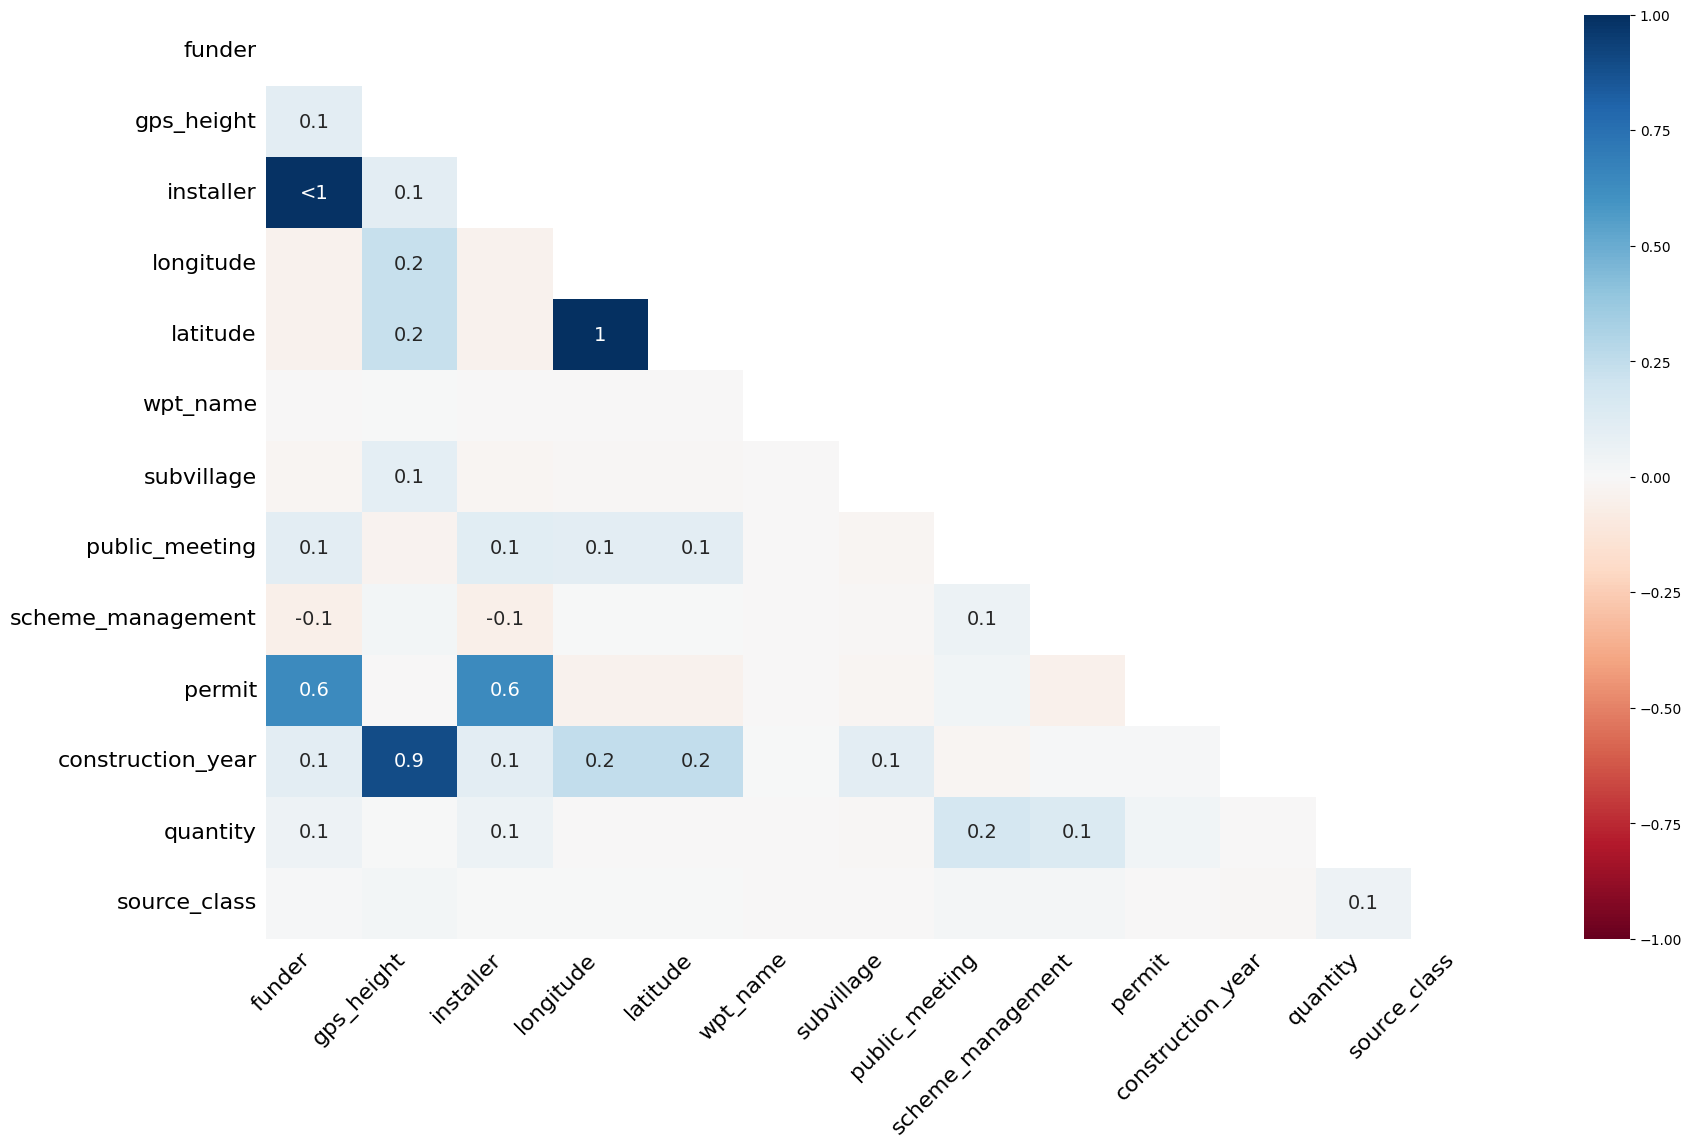

In [428]:

msno.heatmap(df4)

<Axes: >

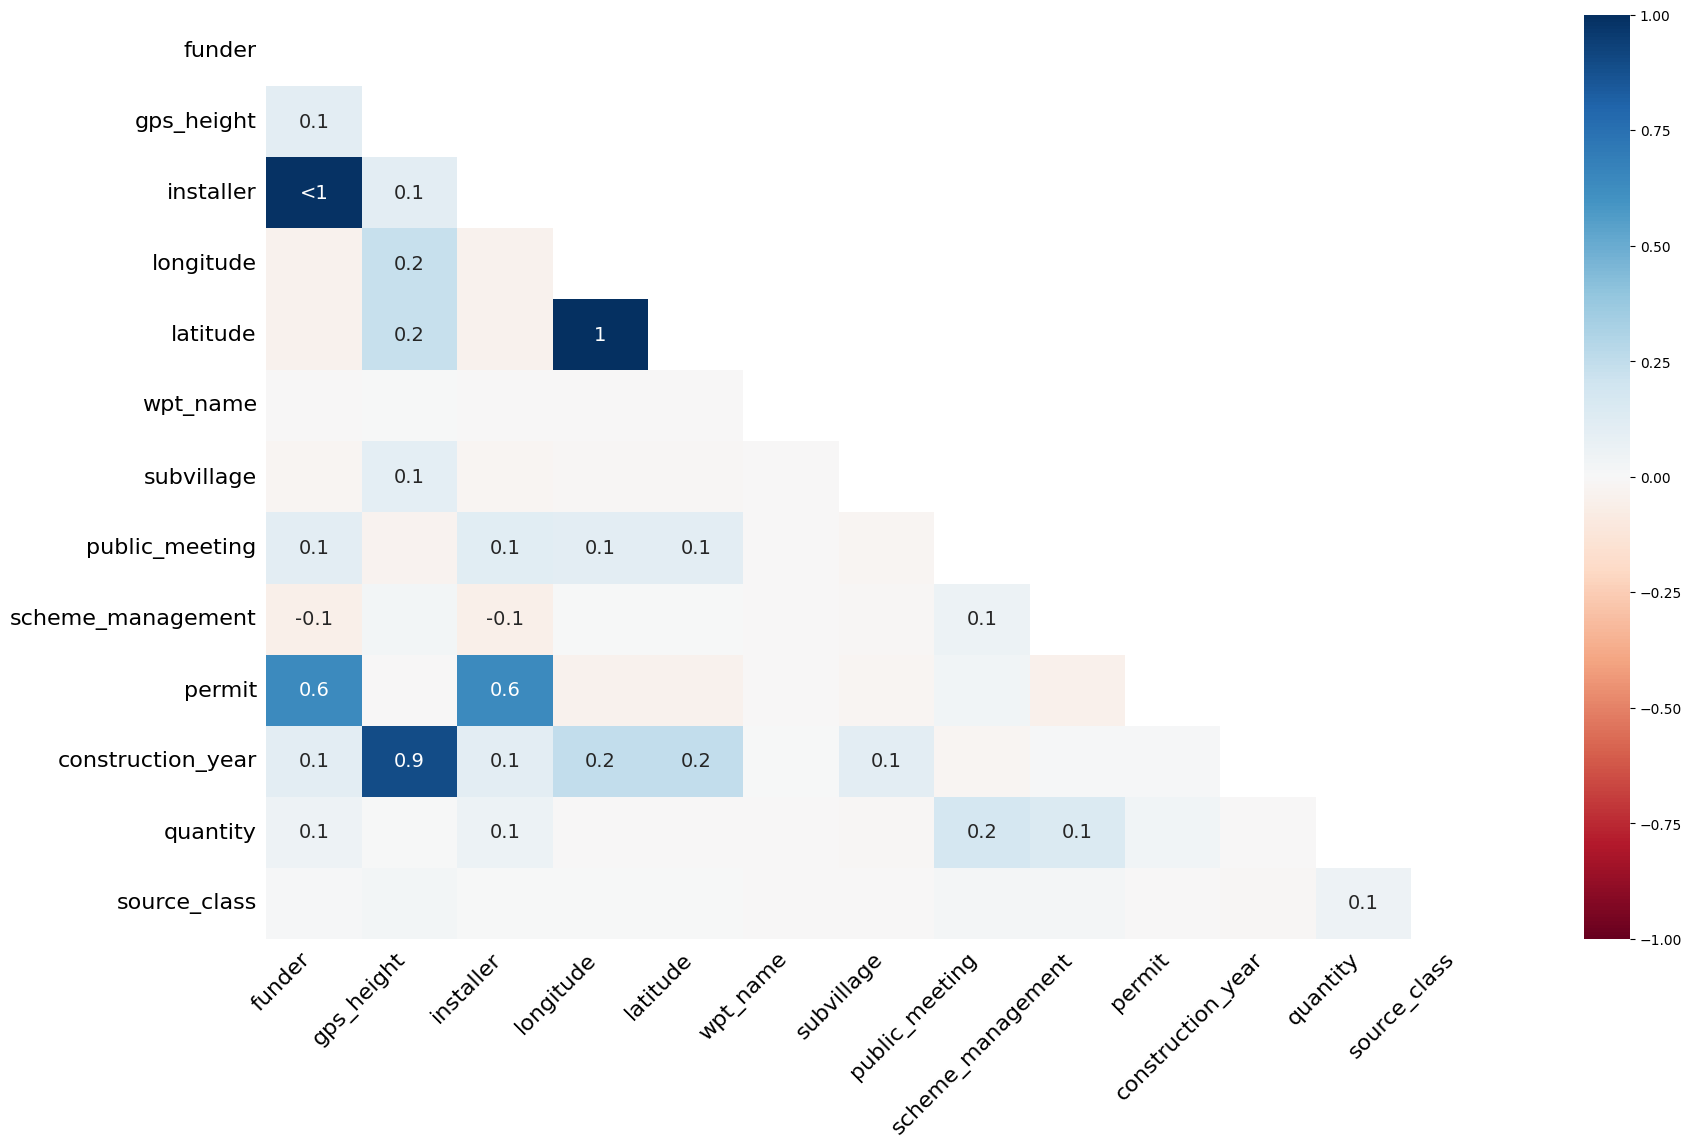

In [429]:

msno.heatmap(df4)

In [430]:
# Estudio la relacion entre funder, installer y permit
# Voy a listar en un df los datos que tengan missings en funder o installer para ver alguna relación

df_funder_installer_miss = df4[(df4.funder.isnull()) | (df4.installer.isnull())]


In [431]:
df_funder_installer_miss

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,source_class,waterpoint_type,status_group,year_recorded
34,41583,0.0,NaN,NaN,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,Rufiji,Kilombero B,Pwani,60,63,Mafia,Baleni,100,True,VWC,False,NaN,handpump,user-group,never pay,salty,enough,shallow well,groundwater,hand pump,functional,2011
43,19282,0.0,NaN,1642.0,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,True,VWC,NaN,1980.0,motorpump,user-group,other/unknown,unknown,dry,borehole,groundwater,communal standpipe,non functional,2013
47,13620,0.0,NaN,NaN,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,VWC,NaN,NaN,gravity,user-group,never pay,good,enough,spring,groundwater,communal standpipe,functional,2011
65,51072,0.0,NaN,1415.0,NaN,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,True,VWC,NaN,1970.0,motorpump,user-group,other/unknown,unknown,dry,borehole,groundwater,communal standpipe,non functional,2013
71,17386,0.0,NaN,NaN,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,Rufiji,Lembuka,Mbeya,12,7,Mbarali,Mawindi,0,True,VWC,False,NaN,gravity,user-group,never pay,good,insufficient,river/lake,surface,communal standpipe,non functional,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59366,55232,0.0,NaN,1541.0,NaN,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,Singida,13,2,Singida Rural,Puma,200,True,VWC,NaN,2000.0,handpump,user-group,never pay,good,insufficient,shallow well,groundwater,hand pump,functional,2013
59370,14796,200.0,NaN,1154.0,NaN,30.058731,-4.902633,Village Office,0,Lake Tanganyika,Mazungwe,Kigoma,16,2,Kasulu,Rusesa,1,True,NaN,False,NaN,other,other/unknown,monthly,unknown,NaN,other,NaN,other,functional,2013
59376,34716,0.0,NaN,1581.0,NaN,34.821039,-5.076258,Nasingo,0,Internal,Hu,Singida,13,2,Singida Rural,Dung'unyi,1,True,VWC,NaN,1990.0,other,user-group,other/unknown,unknown,dry,shallow well,groundwater,other,non functional,2013
59387,26640,100.0,NaN,25.0,NaN,39.176480,-6.957098,Kwa Maliba,0,Wami / Ruvu,Mtaa Wa Yangeyange,Dar es Salaam,7,2,Ilala,Msongola,100,NaN,WUA,False,2000.0,submersible,user-group,per bucket,good,enough,borehole,groundwater,communal standpipe,functional,2013


<Axes: >

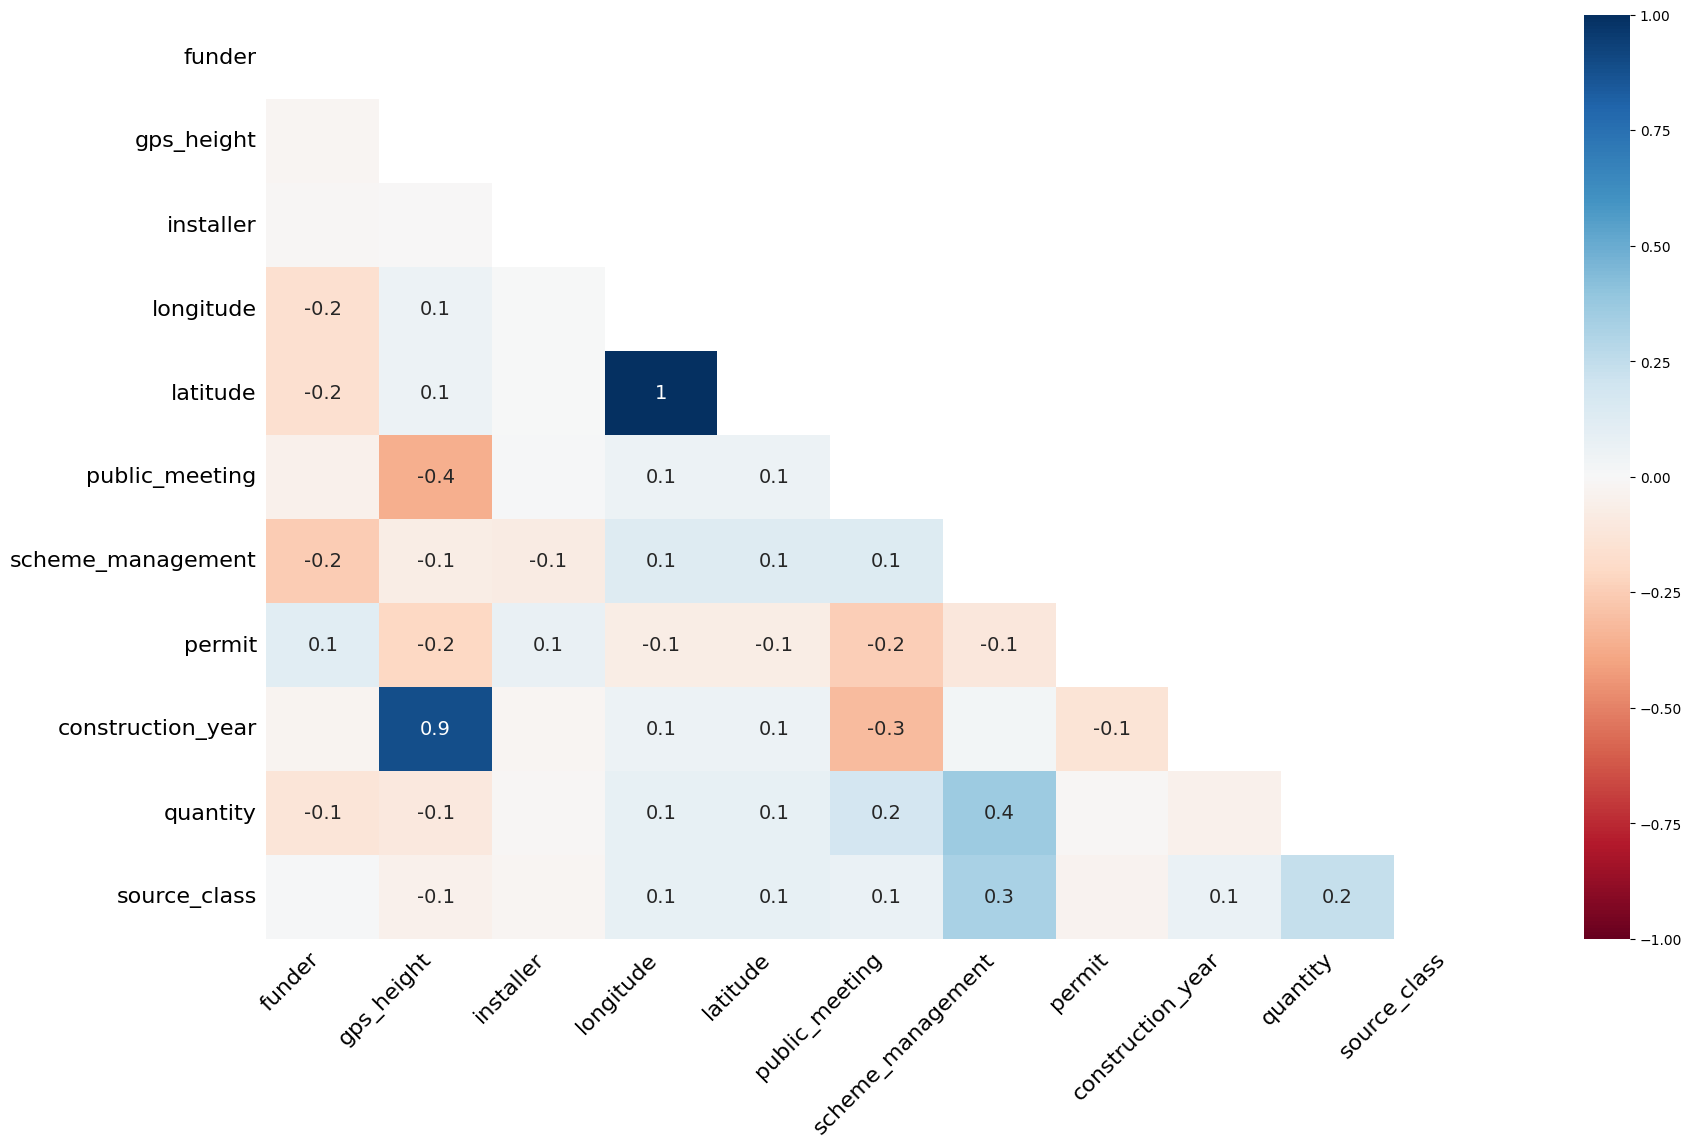

In [432]:
msno.heatmap(df_funder_installer_miss)
# Observamos relaciones relativamente más fuertes en otras variables que en el heatmap anterior, lo que indica que no son datos faltantes aleatoriamente.
# No debemos eliminar las variables ni los registros porque estaríamos perdiendo información importante
# Le voy a asignar un installer y un funder determinado, pero antes voy a ver los missings que no son comunes a ambos (hay solo 20 registros) y voy 
# a observar la variable permit

In [433]:
missing_values_summary(df_funder_installer_miss)

,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,4414,98.4
gps_height,2474,55.2
installer,4432,98.8
longitude,19,0.4
latitude,19,0.4
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [434]:
# muestro registros con funder nor installer
df_funder_installer_miss_nor = df_funder_installer_miss[(df_funder_installer_miss['funder'].isnull()) ^ (df_funder_installer_miss['installer'].isnull())]
pd.set_option('display.max_columns', None)


In [435]:
missing_values_summary(df_funder_installer_miss_nor)


,Valores Nulos,% de Valores Nulos
id,0,0.0
amount_tsh,0,0.0
funder,53,42.7
gps_height,75,60.5
installer,71,57.3
longitude,6,4.8
latitude,6,4.8
wpt_name,0,0.0
num_private,0,0.0
basin,0,0.0


In [436]:
df_funder_installer_miss_nor.shape
# Solamente hay 131 que tienen missing funder nor installer, una parte no significativa del conjunto de datos. 
# Interpreto que la correlación de missings en estas dos variables es total 

(124, 31)

-------------- FUNDER ---------------
count                      54986
unique                      1895
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object
NaN:    4414
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


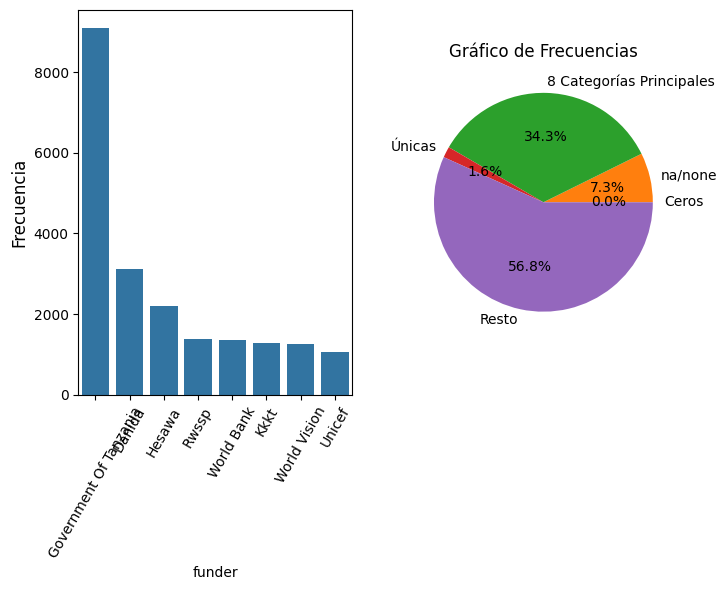

---------------------------------------------


In [437]:
# repito el analisis de ambas variables que hice:
descripcion_categorica(df4, 'funder', 0)

-------------- INSTALLER ---------------
count     54968
unique     2144
top         DWE
freq      17402
Name: installer, dtype: object
NaN:    4432
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


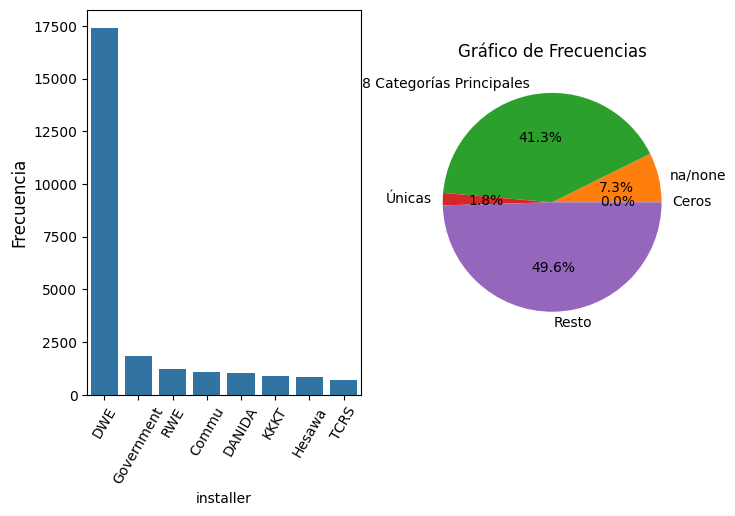

---------------------------------------------


In [438]:
descripcion_categorica(df4, 'installer', 0)

In [439]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Funcion de NuestrasFunciones de Mineria de Datos, adaptada por chatGPT
def cramers_v(var1, var2):
    # Convertir las variables a tipo de datos de categoría si no lo son
    if not pd.api.types.is_categorical_dtype(var1):
        var1 = var1.astype('category')
    if not pd.api.types.is_categorical_dtype(var2):
        var2 = var2.astype('category')
    
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(var1, var2)
    
    # Calcular el coeficiente de contingencia de Cramer
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k-1), (r-1)))
    
    return cramers_v

# Ejemplo de uso:
correlation = cramers_v(df4['installer'], df4['funder'])
print("Coeficiente de contingencia de Cramer:", correlation)


Coeficiente de contingencia de Cramer: 0.7653855130947762


In [440]:
# Pruebo a obtener la v de cramer sobre las mismas variables pero sobre un df al que hemos eliminado los registros de missings. 
df4_sin_missings_installer_funder = df4.dropna(subset=['installer', 'funder'])
correlation = cramers_v(df4_sin_missings_installer_funder['installer'], df4_sin_missings_installer_funder['funder'])
print("Coeficiente de contingencia de Cramer sin las filas con missings:", correlation)

# Parece que no tenía en cuenta los missings

Coeficiente de contingencia de Cramer sin las filas con missings: 0.7653855130947762


In [441]:
correlation_installer = cramers_v(df4_sin_missings_installer_funder['installer'], df4_sin_missings_installer_funder['status_group'])
correlation_funder = cramers_v(df4_sin_missings_installer_funder['funder'], df4_sin_missings_installer_funder['status_group'])

print("Coeficiente de contingencia de Cramer installer - target:", correlation_installer)
print("Coeficiente de contingencia de Cramer funder    - target:", correlation_funder)
#Observamos que las variables instaler y funder tienen bastante correlación con la variable target, un 35% (en aquellos que no tienen missings) 

Coeficiente de contingencia de Cramer installer - target: 0.36473343685433957
Coeficiente de contingencia de Cramer funder    - target: 0.3577619496460759


In [442]:
# Dudo si imputar los datos aleatoriamente o imputarlos a una categoría única. También dudo si imputar los registros de las categorias con muy 
#   poca frecuencia al mismo registro, ya que un funder o un installer con 2 o 3 bombas no aporta información a un modelo predictivo. 

# Por el momento las imputo a la catgeoría unknown y continuo
# Reemplazar los valores faltantes en las columnas 'installer' y 'funder' por 'unknown'
df4['installer'].fillna('unknown', inplace=True)
df4['funder'].fillna('unknown', inplace=True)

""" del df4_sin_missings_installer_funder
del df_funder_installer_miss_nor """


' del df4_sin_missings_installer_funder\ndel df_funder_installer_miss_nor '

-------------- INSTALLER ---------------
count     59400
unique     2144
top         DWE
freq      17402
Name: installer, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


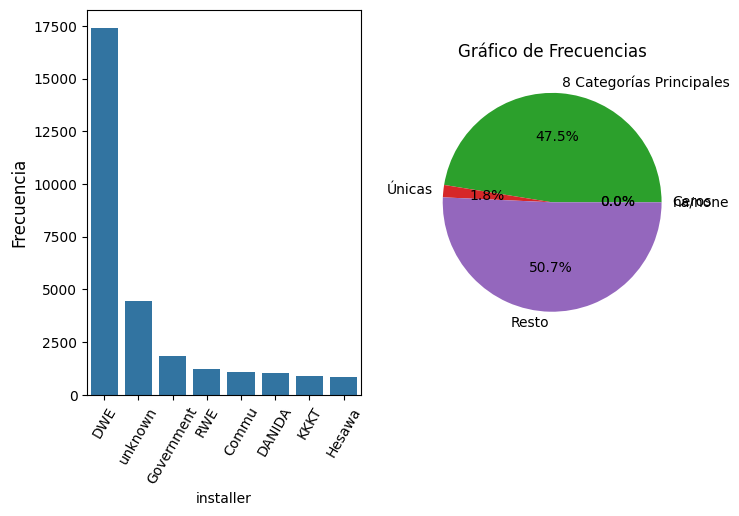

---------------------------------------------


In [443]:
descripcion_categorica(df4, 'installer', 0)

In [444]:
# También asigno una categoría a los funders e installers con menos de 5 bombas, ya que se me hace dificil 
#   pensar que el modelo puede predecir target con tan pocos registros
installer_counts = df4['installer'].value_counts()
funder_counts = df4['funder'].value_counts()

# Identifica los valores con frecuencia inferior a 5
installers_to_replace = installer_counts[installer_counts < 5].index
funders_to_replace = funder_counts[funder_counts < 5].index

# Reemplaza los valores con frecuencia inferior a 5 con 'others'
df4_installer_funder_others = df4.copy()
df4_installer_funder_others['installer'] = df4['installer'].replace(installers_to_replace, 'others')
df4_installer_funder_others['funder'] = df4['funder'].replace(funders_to_replace, 'others')

-------------- FUNDER ---------------
count                      59400
unique                       573
top       Government Of Tanzania
freq                        9084
Name: funder, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


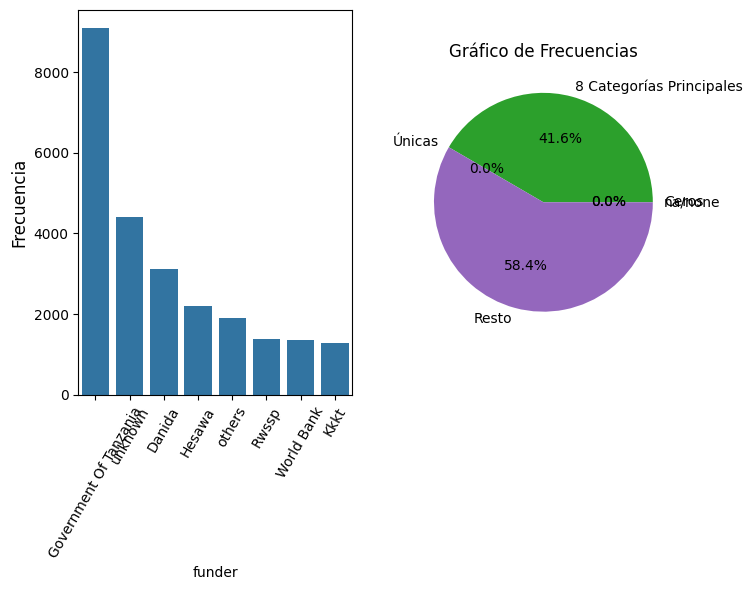

---------------------------------------------


In [445]:
descripcion_categorica(df4_installer_funder_others, 'funder', 0)


-------------- INSTALLER ---------------
count     59400
unique      620
top         DWE
freq      17402
Name: installer, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


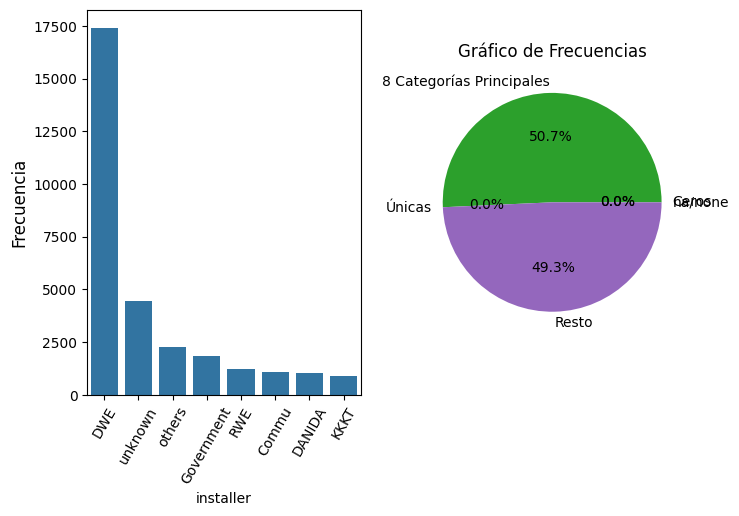

---------------------------------------------


In [446]:
descripcion_categorica(df4_installer_funder_others, 'installer', 0)
#observamos que ahora unkown y others están entre las primeras categorías

In [447]:
# Veamos si la correlación a aumentado con la variable objetivo
correlation_installer = cramers_v(df4_installer_funder_others['installer'], df4['status_group'])
correlation_funder = cramers_v(df4_installer_funder_others['funder'], df4['status_group'])

print("Coeficiente de contingencia de Cramer installer - target:", correlation_installer)
print("Coeficiente de contingencia de Cramer funder    - target:", correlation_funder)
# ha caido en 5 puntos

Coeficiente de contingencia de Cramer installer - target: 0.312667136556446
Coeficiente de contingencia de Cramer funder    - target: 0.31187817370597126


In [448]:
df4_installer_sin_others = df4_filtered = df4.loc[(df4_installer_funder_others['installer'] != 'others')]
df4_funder_sin_others = df4.loc[(df4_installer_funder_others['funder'] != 'others')]

correlation_installer = cramers_v(df4_installer_funder_others['installer'], df4['status_group'])
correlation_funder = cramers_v(df4_installer_funder_others['funder'], df4['status_group'])

print("Coeficiente de contingencia de Cramer installer - target:", correlation_installer)
print("Coeficiente de contingencia de Cramer funder    - target:", correlation_funder)

Coeficiente de contingencia de Cramer installer - target: 0.312667136556446
Coeficiente de contingencia de Cramer funder    - target: 0.31187817370597126


In [449]:
df4_installer_sin_others.shape

(57146, 31)

In [450]:
df4.shape
# La V de cramer no ha cambiado quitando los que tienen < 5 bombas. Y si aumento ese n = 5 progresivamente, ¿cuándo disminuirá la
# V de Cramer?

(59400, 31)

In [451]:
# Pongo como others a los que han puesto menos de 50 bombas
n = 50
installer_counts = df4['installer'].value_counts()
funder_counts = df4['funder'].value_counts()

# Identifica los valores con frecuencia inferior a n
installers_to_replace = installer_counts[installer_counts < n].index
funders_to_replace = funder_counts[funder_counts < n].index

# Reemplaza los valores con frecuencia inferior a n con 'others'
df4_installer_funder_others['installer'] = df4['installer'].replace(installers_to_replace, 'others')
df4_installer_funder_others['funder'] = df4['funder'].replace(funders_to_replace, 'others')

In [452]:
# repetimos V de cramer sin others:
df4_installer_sin_others = df4_filtered = df4.loc[(df4['installer'] != 'others')]
df4_funder_sin_others = df4.loc[(df4['funder'] != 'others')]

correlation_installer = cramers_v(df4['installer'], df4['status_group'])
correlation_funder = cramers_v(df4['funder'], df4['status_group'])

print("Coeficiente de contingencia de Cramer installer - target:", correlation_installer)
print("Coeficiente de contingencia de Cramer funder    - target:", correlation_funder)

Coeficiente de contingencia de Cramer installer - target: 0.3507098881502388
Coeficiente de contingencia de Cramer funder    - target: 0.3437249234390455


0.2733436095449473
original df4: 0.3507098881502388


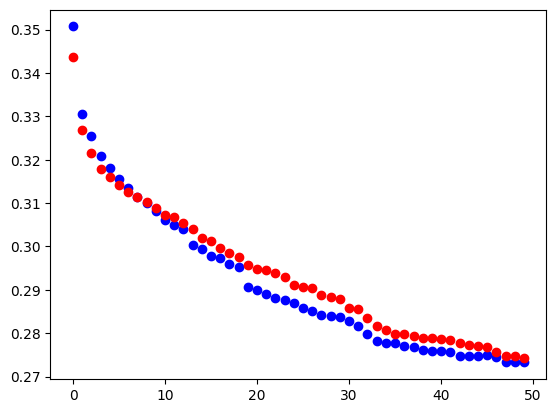

In [453]:
# Trato de graficar como disminuye V de cramer en función de n.

df4_installer_others = df4.copy()
df4_funder_others = df4.copy()

"""
Reemplaza la etiqueta en la columna por 'X' si la 
frecuencia es <= a n
"""
def reemplazar_baja_frecuencia_por_n_X(df, col, n, X):
    counts = df[col].value_counts()
    # Identifica los valores con frecuencia inferior a n
    col_to_replace = counts[counts <= n].index
    # Reemplaza los valores con frecuencia inferior a n por 'others'
    df[col] = df[col].replace(col_to_replace, X)

def v_cramer_dos_col(df, col, target):
    df_filtered = df.loc[(df[col] != 'others')]
    correlation_col = cramers_v(df_filtered[col], df_filtered[target])
    return (correlation_col)


lista_v_cramer_n_installer = []
lista_n = []
for n in range(0, 50):
    reemplazar_baja_frecuencia_por_n_X(df4_installer_others, 'installer', n, 'others')
    lista_v_cramer_n_installer.append(v_cramer_dos_col(df4_installer_others, 'installer', 'status_group'))
    lista_n.append(n)
lista_v_cramer_n_funder = []
for n in range(0, 50):
    reemplazar_baja_frecuencia_por_n_X(df4_funder_others, 'funder', n, 'others')
    lista_v_cramer_n_funder.append(v_cramer_dos_col(df4_funder_others, 'funder', 'status_group'))


print(lista_v_cramer_n_installer[-1])
plt.scatter(lista_n, lista_v_cramer_n_installer, label='installer', c='blue')
plt.scatter(lista_n, lista_v_cramer_n_funder, label='funder', c='red')
print("original df4: " + str(v_cramer_dos_col(df4, 'installer', 'status_group')))
df4_installer_others = df4
df4_funder_others = df4

In [454]:
# Vaya... Después de todo esto descubro que la correlación entre estas variables y la variable objetivo baja abruptamente 
#   desde el principio.
# Ha sido muy interesante ver que esto no ha servido para nada y he aprendido mucho, esa es la lección
# Decido no convertir las categorías únicas. 
# Por curiosidad y para finalizar, voy a ver si la V de cramer se afecta positivamente si 
#   1- las distribujo aleatoriamente
#   2- imputarlos como Distinct, es decir, asociarles un valor unico aleatorio


"""reemplazar_baja_frecuencia_por_n_X(df4, 'funder', 2, 'SINGULAR')
descripcion_categorica(df4, 'funder') """

"reemplazar_baja_frecuencia_por_n_X(df4, 'funder', 2, 'SINGULAR')\ndescripcion_categorica(df4, 'funder') "

In [455]:
df4_distr_aleatoria = df4.copy()
# Convertir los valores 'unknown' a NaN
df4_distr_aleatoria['funder'].replace('unknown', np.nan, inplace=True)

# Crear el SimpleImputer
imputer_aleatorio = fe_imp.RandomSampleImputer()
# Aplicar la imputación solo a la columna 'funder'
df4_distr_aleatoria['funder'] = imputer_aleatorio.fit_transform(df4_distr_aleatoria[['funder']])


In [456]:
print((df4['funder'] == 'Kalta').sum()) # Si el codigo se ejecuta de nuevo, es posible que ambos números sean iguales antes después
print((df4_distr_aleatoria['funder'] == 'Kalta').sum())
# Vemos que se han repartido 
# Haciendo una analisis de categorias como los que he hecho varias veces (descripcion_categorica(df, columna)) la distribución es similar

30
35


In [457]:
# provamos V de Cramer
print("v cramer funder con distr aleatoria del inputer:    ", v_cramer_dos_col(df4_distr_aleatoria, 'funder', 'status_group'))

df4_distr_aleatoria['installer'].replace('unknown', np.nan, inplace=True)
imputer_aleatorio = fe_imp.RandomSampleImputer()
df4_distr_aleatoria['installer'] = imputer_aleatorio.fit_transform(df4_distr_aleatoria[['installer']])
print("v cramer installer con distr aleatoria del inputer: ", v_cramer_dos_col(df4_distr_aleatoria, 'installer', 'status_group'))

print("v cramer funder original:    ", v_cramer_dos_col(df4, 'funder', 'status_group'))
print("v cramer installer original: ", v_cramer_dos_col(df4, 'installer', 'status_group'))
# La original (con una categoría para missings) tiene algo más de correlación con la variable objetivo mejor que la imputada aleatoria

v cramer funder con distr aleatoria del inputer:     0.3335137503931169
v cramer installer con distr aleatoria del inputer:  0.34166267747221835
v cramer funder original:     0.3437249234390455
v cramer installer original:  0.3507098881502388


-------------- INSTALLER ---------------
count     59400
unique     6576
top         DWE
freq      17402
Name: installer, dtype: object
NaN:    0
none:   0
ceros:  0
-------------- Head y Tail ---------------
installer
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
Name: count, dtype: int64
installer
NPf4    1
rAVQ    1
dDXF    1
LUlW    1
iRp5    1
Name: count, dtype: int64


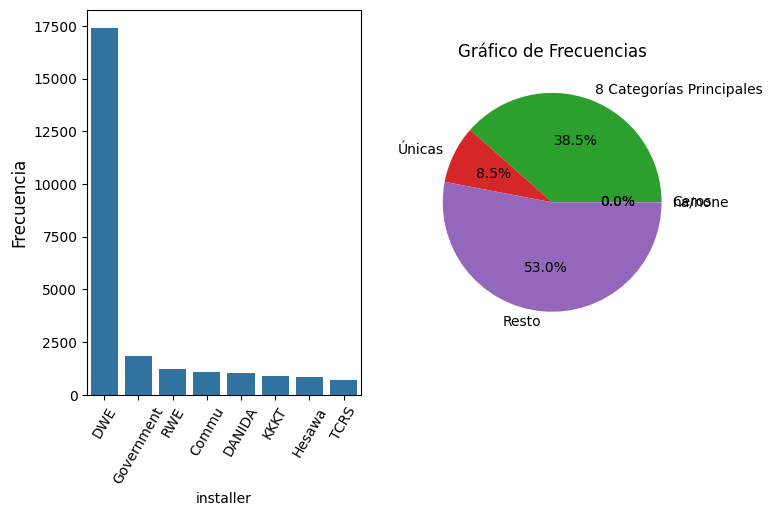

---------------------------------------------


In [458]:
# Y para terminar... imputamos este grupo como Distinct. Para ello les daremos un valor aleatorio, que serán 5 letras al azar
df4_Distinct = df4.copy()

df4_Distinct['funder'].replace('unknown', np.nan, inplace=True)
# Obtener la cantidad de valores faltantes en 'funder'
missing_count = df4_Distinct['funder'].isnull().sum()
# Generar cadenas aleatorias de longitud 4
random_strings = [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), size=4)) for _ in range(missing_count)]
# Llenar los valores faltantes en 'funder' con las cadenas aleatorias
df4_Distinct.loc[df4_Distinct['funder'].isnull(), 'funder'] = random_strings
# Mostrar el DataFrame resultante


# igual para installer
df4_Distinct['installer'].replace('unknown', np.nan, inplace=True)
# Obtener la cantidad de valores faltantes en 'funder'
missing_count = df4_Distinct['installer'].isnull().sum()
# Generar cadenas aleatorias de longitud 4
random_strings = [''.join(np.random.choice(list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'), size=4)) for _ in range(missing_count)]
# Llenar los valores faltantes en 'funder' con las cadenas aleatorias
df4_Distinct.loc[df4_Distinct['installer'].isnull(), 'installer'] = random_strings
descripcion_categorica(df4_Distinct, 'installer')

In [459]:
print("v cramer funder original:    ", v_cramer_dos_col(df4, 'funder', 'status_group'))
print("v cramer installer original:    ", v_cramer_dos_col(df4, 'installer', 'status_group'))
print("v cramer funder imputados distintos Distinct:    ", v_cramer_dos_col(df4_Distinct, 'funder', 'status_group'))
print("v cramer installer imputados distintos Distinct:    ", v_cramer_dos_col(df4_Distinct, 'installer', 'status_group'))

# Genial! Parece que hemos mejorado bastante la predición al imputar los unkowns que antes eran missings como datos que no se repiten

v cramer funder original:     0.3437249234390455
v cramer installer original:     0.3507098881502388
v cramer funder imputados distintos Distinct:     0.45052657455168055
v cramer installer imputados distintos Distinct:     0.45631513112141814


In [461]:
# A continuacón guardaré el df df4_Distinct para seguir en otro jupiter
df4_Distinct.to_pickle("./pickles_temp/V4_1.pkl")